<a href="https://colab.research.google.com/github/codac-black/machine-learning-deep-learning/blob/main/planecrashEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color:orange"> Exploring Trends on Passenger Airline Crashes ✈ 💥</h1>

In [1]:
from google.colab import files
uplaoded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!pip install kaggle

In [3]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d abeperez/historical-plane-crash-data

 33% 5.00M/15.3M [00:00<00:00, 29.5MB/s]
100% 15.3M/15.3M [00:00<00:00, 75.0MB/s]


In [5]:
!unzip historical-plane-crash-data.zip

Archive:  historical-plane-crash-data.zip
  inflating: Plane Crashes.csv       
  inflating: Plane Crashes.xlsx      


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import matplotlib.style as style
sns.set()
sns.set_style("whitegrid")
style.use('fivethirtyeight')

### Load Data

In [8]:
# load data
df = pd.read_csv('/content/Plane Crashes.csv')

### Explore the data

In [9]:
df.head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown


In [10]:
# columns names
df.columns

Index(['Date', 'Time', 'Aircraft', 'Operator', 'Registration', 'Flight phase',
       'Flight type', 'Survivors', 'Crash site', 'Schedule', 'MSN', 'YOM',
       'Flight no.', 'Crash location', 'Country', 'Region', 'Crew on board',
       'Crew fatalities', 'Pax on board', 'PAX fatalities', 'Other fatalities',
       'Total fatalities', 'Circumstances', 'Crash cause'],
      dtype='object')

In [11]:
# check for missing values
print(df.isna().sum())
print(f'Total missing values: {df.isna().sum().sum()}')

Date                    0
Time                14587
Aircraft                1
Operator                0
Registration          815
Flight phase          638
Flight type            57
Survivors            1297
Crash site            383
Schedule             8946
MSN                  4182
YOM                  5311
Flight no.          28536
Crash location         12
Country                 1
Region                  1
Crew on board          24
Crew fatalities         1
Pax on board           54
PAX fatalities          1
Other fatalities       10
Total fatalities        0
Circumstances          25
Crash cause             0
dtype: int64
Total missing values: 64882


In [12]:
df.describe()

,YOM,Flight no.,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities
count,23225.000000,0.0,28512.000000,28535.000000,28482.000000,28535.000000,28526.000000,28536.000000
mean,1931.942519,NaN,3.052539,1.771649,7.705393,3.679727,0.109760,5.567389
std,285.486067,NaN,11.738151,2.520554,24.066368,15.288171,2.644296,16.713203
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1944.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1958.000000,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1974.000000,NaN,4.000000,3.000000,4.000000,1.000000,0.000000,5.000000
max,19567.000000,NaN,1924.000000,25.000000,509.000000,506.000000,297.000000,520.000000


In [13]:
# percentage missing values
missing = df.isna().sum().sum() / df.size
missing = np.round(missing, 2)
print(f'Percentage missing values: {missing * 100}%')

Percentage missing values: 9.0%


In [14]:
# create a copy of the data
df_pln = df.copy()

In [15]:
df_pln.groupby(['Schedule']).head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
5,1918-07-14,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,...,United Kingdom,Europe,1.0,1.0,0.0,0.0,0.0,1,The pilot departed Isle of Grain on a delivery...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022-05-20,NaN,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Jundiaí – Eldorado do Sul,...,Brazil,South America,2.0,0.0,0.0,0.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown
28532,2022-05-23,18H 29M 0S,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",Celaya - Durango,...,Mexico,Central America,1.0,1.0,1.0,1.0,0.0,2,While approaching Durango Airport on a flight ...,Unknown
28533,2022-05-24,15H 40M 0S,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,...,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown
28534,2022-05-29,10H 7M 0S,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,...,Nepal,Asia,3.0,3.0,19.0,19.0,0.0,22,The twin engine airplane departed Pokhara City...,Human factor


In [16]:
df_pln.dtypes

Date                 object
Time                 object
Aircraft             object
Operator             object
Registration         object
Flight phase         object
Flight type          object
Survivors            object
Crash site           object
Schedule             object
MSN                  object
YOM                 float64
Flight no.          float64
Crash location       object
Country              object
Region               object
Crew on board       float64
Crew fatalities     float64
Pax on board        float64
PAX fatalities      float64
Other fatalities    float64
Total fatalities      int64
Circumstances        object
Crash cause          object
dtype: object

In [17]:
df_pln['Date'] = pd.to_datetime(df.Date)

In [18]:
for i in df_pln.columns:
  miss = df_pln[i].isna().sum() #/ df_pln.size
  #miss = np.round(miss, 2)
  print(f"percentage missing values for {i}:   {miss}")

percentage missing values for Date:   0
percentage missing values for Time:   14587
percentage missing values for Aircraft:   1
percentage missing values for Operator:   0
percentage missing values for Registration:   815
percentage missing values for Flight phase:   638
percentage missing values for Flight type:   57
percentage missing values for Survivors:   1297
percentage missing values for Crash site:   383
percentage missing values for Schedule:   8946
percentage missing values for MSN:   4182
percentage missing values for YOM:   5311
percentage missing values for Flight no.:   28536
percentage missing values for Crash location:   12
percentage missing values for Country:   1
percentage missing values for Region:   1
percentage missing values for Crew on board:   24
percentage missing values for Crew fatalities:   1
percentage missing values for Pax on board:   54
percentage missing values for PAX fatalities:   1
percentage missing values for Other fatalities:   10
percentage mis

### How have Airplane Crashes trended over the years?


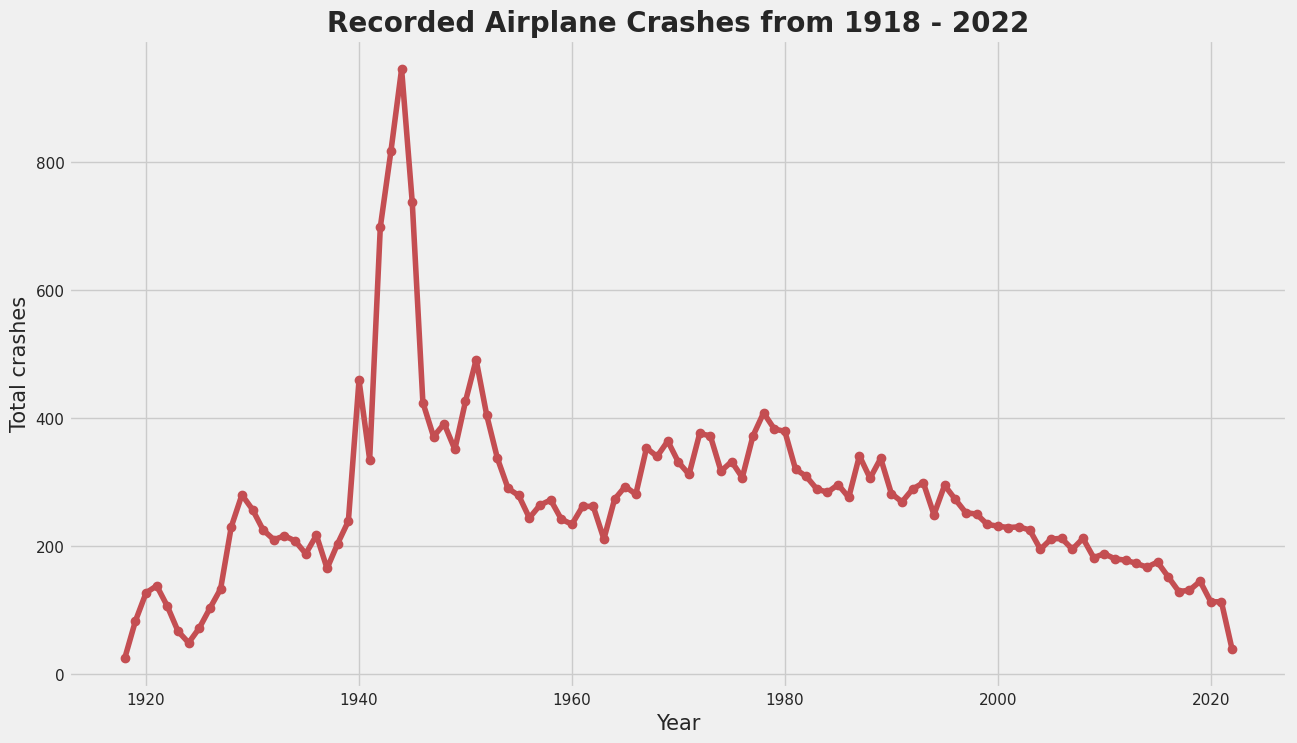

In [19]:
# # Generate a frequency distribution table containing the total crashes per year
accidents_per_year = df_pln.groupby(df_pln.Date.dt.year).size().reset_index(name='Freq')

# Create a line plot with visible data points
plt.figure(figsize=(14,8))
plt.plot(
    accidents_per_year.Date,
    accidents_per_year.Freq,
    marker='o',
    linestyle='-',
    color='r'
)

plt.title('Recorded Airplane Crashes from 1918 - 2022', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total crashes', fontsize=15)

plt.show()

In [20]:
# interactive visual using plotty
# !pip install plotly
import plotly.express as px

# Create an interactive line plot with visible data points using Plotly Express

fig = px.line(
    accidents_per_year, x='Date', y='Freq', markers=True,
    title = 'Recorded Airplane Crashes from 1918 - 2022',
    labels = {'Date': 'Year', 'Freq': 'Total Crashes'}
)

# Set plot labels and title
fig.update_layout(
    title=dict(font=dict(size=20, family='Arial', color='black')),
    xaxis=dict(title=dict(text='Year', font=dict(size=15, family='Arial', color='black'))),
    yaxis=dict(title=dict(text='Total crashes', font=dict(size=15, family='Arial', color='black')))
)

fig.show()


### Have the number of deaths from crashes declined over the years?

In [21]:
# Generate a frequency distribution table containing the total fatalities from crashes per year
fatalities_per_year = df_pln.groupby(df_pln.Date.dt.year)['Total fatalities'].sum().reset_index(name='Freq')

# Create an interactive line plot with visible data points using Plotly Express
fig = px.line(fatalities_per_year, x='Date', y='Freq', markers=True,
              title="Total Fatalities from Airplane Crashes from 1918 - 2022",
              labels={'Date': 'Year', 'Freq': 'Total Fatalities'}
              )

# Set plot labels and title
fig.update_layout(title=dict(font=dict(size=20, family='Arial', color='black')),
                  xaxis=dict(title=dict(text='Year', font=dict(size=15, family='Arial', color='black'))),
                  yaxis=dict(title=dict(text='Total Fatalities', font=dict(size=15, family='Arial', color='black')))
                  )

# show the interactive plot
fig.show()

Which airplane crash causes have been fully addressed over the years?

In [22]:
# generates a frequency distribution table containing the total crashes per year and cause

accidents_per_cause = df_pln.groupby([df_pln.Date.dt.year, 'Crash cause']).size().reset_index(name='Freq')

# Create an interactive line plot with multiple trends by cause using Plotly Express
fig = px.line(accidents_per_cause, x='Date', y='Freq', color='Crash cause',
              title="Airplane Crash Trends by Cause from 1918 - 2022",
              labels={'Date': 'Year', 'Freq': 'Total Crashes'},
              facet_col='Crash cause', facet_col_wrap=2, line_group='Crash cause')

# Set plot labels and title
fig.update_layout(title=dict(font=dict(size=20, family='Arial', color='black')),
                  xaxis=dict(title=dict(text='Year', font=dict(size=15, family='Arial', color='black'))),
                  yaxis=dict(title=dict(text='Total crashes', font=dict(size=15, family='Arial', color='black'))),
                  height = 800
                  )

# Show the interactive plot
fig.show()


### When do airplane crashes usually occur?

In [23]:
# generates a frequency distribution table containing the total crashes per flight phase

accidents_per_flight_phase = df_pln.groupby(df_pln['Flight phase']).size().reset_index(name='Freq')

# Create a polar bar plot of airplane crashes by flight phase using Plotly Express
fig = px.bar_polar(accidents_per_flight_phase, r='Freq', theta='Flight phase',
                   color='Flight phase',
                   color_discrete_sequence=px.colors.qualitative.Set1,
                   title="Airline Crash by Flight Phase",
                   labels={'Flight phase': 'Flight Phase', 'Freq': 'Total crashes'}
                   )

# Customize the layout
fig.update_layout(
    polar=dict(radialaxis=dict(visible=False), angularaxis=dict(direction="clockwise")),
    showlegend=True  # To hide the legend
)

# Show the interactive plot
fig.show()

In [24]:
# Create a pie chart of airplane crashes by flight phase using Plotly Express
fig = px.pie(accidents_per_flight_phase, values='Freq', names='Flight phase',
             title="Airline Crash by Flight Phase",
             labels={'Flight phase': 'Flight Phase', 'Freq': 'Total crashes'}
             )

# Customize the layout
fig.update_layout(
    title=dict(font=dict(size=20, family='Arial', color='black')),
)

# Show the interactive plot
fig.show()

### Where do airplane crashes usually occur?



In [25]:
# generates a frequency distribution table containing the total crashes per region
accidents_per_region = df_pln.groupby(df.Region).size().reset_index(name='Freq')

# Create a horizontal bar graph of airplane crashes by region using Plotly Express
fig = px.bar(accidents_per_region, x='Freq', y='Region',
             title="Regions with the Highest Occurrence of Airline Crashes",
             labels={'Freq': 'Total crashes', 'Region': 'Region'},
             orientation='h')

# Customize the layout
fig.update_layout(
    showlegend=False,  # To hide the legend
    title=dict(font=dict(size=20, family='Arial', color='black')),
    xaxis=dict(title=dict(text='Total crashes', font=dict(size=15, family='Arial', color='black'))),
    yaxis=dict(title=dict(text='Region', font=dict(size=15, family='Arial', color='black')))
)

# Show the interactive plot
fig.show()

### Which aircraft incurred the most crashes?

In [30]:
# Generate a frequency distribution table containing the total crashes per aircraft
accidents_per_aircraft = df_pln.groupby('Aircraft').size().reset_index(name='Freq').nlargest(20, 'Freq')

# Create a horizontal bar graph of airplane crashes by aircraft using Plotly Express
fig = px.bar(accidents_per_aircraft, x='Freq', y='Aircraft',
             title="Top 10 Aircrafts with the Most Airplane Crashes",
             labels={'Freq': 'Total crashes', 'Aircraft': 'Aircraft'},
             orientation='h')

# Reverse the order of bars
fig.update_traces(marker=dict(color='rgba(50, 171, 96, 0.6)'), selector=dict(type='bar'))

# Customize the layout
fig.update_layout(
    showlegend=False,  # To hide the legend
    title=dict(font=dict(size=20, family='Arial', color='black')),
    xaxis=dict(title=dict(text='Total crashes', font=dict(size=15, family='Arial', color='black'))),
    yaxis=dict(title=dict(text='Aircraft', font=dict(size=15, family='Arial', color='black')))
)

# Show the interactive plot
fig.show()